# What Parking Tickets Mean for Toronto

Parking violations and parking tickets are a contentious topic for Torontonians. Drivers are subjected to misleading signs, police blitzes, and towings.

Toronto parking regulations have a reputation for being confusing and misleading. In this notebook we study parking tickets and to see what impact they have on the city and its citizens.

The data was obtained form the city of Toronto's Open Data catalogue and can be downloaded [here](https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#75d14c24-3b7e-f344-4412-d8fd41f89455)

## Data Dictionary

| Column | Meaning |
| :--- | :--- |
|TAG_NUMBER_MASKED |	First three (3) characters masked with asterisks |
DATE_OF_INFRACTION |	Date the infraction occurred in YYYYMMDD format
INFRACTION_CODE	| Applicable Infraction code (numeric)
INFRACTION_DESCRIPTION |	Short description of the infraction
SET_FINE_AMOUNT |	Amount of set fine applicable (in dollars)
TIME_OF_INFRACTION |	Time the infraction occurred  in HHMM format (24-hr clock)
LOCATION1 |	Code to denote proximity (see table below)
LOCATION2 |	Street address
LOCATION3 |	Code to denote proximity (optional)
LOCATION4 |	Street address (optional)
PROVINCE |	Province or state code of vehicle licence plate


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/coder/anaconda3/envs/dataquest/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/coder/anaconda3/envs/dataquest/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Align tables in markdown

In [2]:
%%html
<style>
    table {
        margin-left: 0 !important
    }
    td, th {
        text-align: left !important
    }
</style>

The `parking_tags_2016.csv` file was created using csvkit's csvstack to combine four CSV files.

In [3]:
tickets = pd.read_csv("data/parking_tickets_2016/parking_tags_2016.csv")

In [4]:
tickets.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254761 entries, 0 to 2254760
Data columns (total 12 columns):
origin                    int64
tag_number_masked         object
date_of_infraction        int64
infraction_code           float64
infraction_description    object
set_fine_amount           int64
time_of_infraction        float64
location1                 object
location2                 object
location3                 object
location4                 object
province                  object
dtypes: float64(2), int64(3), object(7)
memory usage: 959.6 MB


In [5]:
tickets.head()

,origin,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,1,***03850,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,NaN,NaN,ON
1,1,***03851,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
2,1,***98221,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,274 GEORGE ST,NaN,NaN,ON
3,1,***85499,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,270 GEORGE ST,NaN,NaN,ON
4,1,***03852,20160101,406.0,PARK-VEH. W/O VALID ONT PLATE,40,2.0,NR,45 GLOUCESTER ST,NaN,NaN,ON


We can see that some of these columns could be converted to data types that represent them a little better and possibly reduce the memory being used.

For example we could investigate the `infraction_code` values to see if an int is better suited.

In [6]:
tickets['time_of_infraction'].value_counts()

1605.0    4798
1535.0    3513
1606.0    3497
1607.0    3454
1608.0    3304
1505.0    3153
1610.0    3126
950.0     3107
945.0     3093
1609.0    3079
949.0     3055
951.0     3042
1611.0    2974
940.0     2969
1215.0    2960
1140.0    2958
953.0     2958
947.0     2955
952.0     2944
946.0     2939
1217.0    2927
1210.0    2923
944.0     2916
1220.0    2909
943.0     2905
1230.0    2899
1145.0    2890
1225.0    2890
942.0     2890
936.0     2880
          ... 
629.0      120
553.0      118
558.0      117
602.0      111
603.0      109
626.0      105
616.0      104
601.0      104
552.0      102
621.0      102
551.0      100
607.0       98
554.0       96
624.0       94
608.0       93
556.0       92
622.0       90
604.0       90
606.0       88
611.0       87
623.0       85
614.0       85
618.0       84
612.0       83
617.0       82
557.0       82
559.0       82
613.0       71
619.0       70
609.0       70
Name: time_of_infraction, Length: 1440, dtype: int64

In [7]:
tickets.loc[ tickets['time_of_infraction'].isnull() == True]

,origin,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
6958,1,***95889,20160102,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,NaN,N/S,GROSVENOR ST,W/O,BAY ST,ON
6959,1,***65174,20160102,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,23 LASCELLES BLVD,NaN,NaN,ON
11870,1,***13137,20160103,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,149 ICEBOAT TERRACE WAY,NaN,NaN,ON
11871,1,***89885,20160103,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,NaN,NR,6 EMPRESS AVE,NaN,NaN,ON
11872,1,***63273,20160103,3.0,PARK ON PRIVATE PROPERTY,30,NaN,AT,2460 WESTON RD,NaN,NaN,ON
11873,1,***06014,20160103,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,91 AUGUSTA AVE,NaN,NaN,ON
17887,1,***83554,20160104,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,NaN,NaN,195 GERRARD ST E,NaN,NaN,ON
17888,1,***64703,20160104,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,3101 WESTON RD,NaN,NaN,ON
17889,1,***64713,20160104,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,3101 WESTON RD,NaN,NaN,ON
17890,1,***64716,20160104,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,3101 WESTON RD,NaN,NaN,ON


We can convert this column since the values are really four digits representing 24 hour time in the format HHMM. There are some null values so we'll ignore those for now.

In [8]:
tickets['time_of_infraction'] = tickets['time_of_infraction'].astype('uint16', errors='ignore')

In [9]:
tickets.loc[ tickets['infraction_code'].isnull() == True]

,origin,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
1629565,3,***38875,20160916,NaN,PARK ON PRIVATE PROPERTY,30,1042.0,NaN,2075 BAYVIEW AVE,NaN,NaN,ON


We find that there's one ticket with no infraction code. We could replace it with 0 if 0 isn't an infraction code. We can check that below.

In [10]:
tickets[tickets['infraction_code'] == 0]

,origin,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province


We find there is infraction code numbered 0.

In [11]:
tickets.loc[1629565, 'infraction_code'] = 0

In [12]:
tickets[tickets['infraction_code'] == 0]

,origin,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
1629565,3,***38875,20160916,0.0,PARK ON PRIVATE PROPERTY,30,1042.0,NaN,2075 BAYVIEW AVE,NaN,NaN,ON


In [13]:
tickets['infraction_code'] = tickets['infraction_code'].astype('uint16')

In [14]:
tickets.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254761 entries, 0 to 2254760
Data columns (total 12 columns):
origin                    int64
tag_number_masked         object
date_of_infraction        int64
infraction_code           uint16
infraction_description    object
set_fine_amount           int64
time_of_infraction        float64
location1                 object
location2                 object
location3                 object
location4                 object
province                  object
dtypes: float64(1), int64(3), object(7), uint16(1)
memory usage: 946.7 MB


We've managed to reduce memory usage by 13MB. We can convert more of our columns however. The origin column just tracks the spreadsheet number that the row belongs to. It was created when we used CSV kit to combine the files. We know there are only 4 spread sheets numbered 1-4 so we don't need an int64 to store the number. Let's use the int8 datatype instead.

In [15]:
tickets['origin'] = tickets['origin'].astype('int8')

In [16]:
tickets.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254761 entries, 0 to 2254760
Data columns (total 12 columns):
origin                    int8
tag_number_masked         object
date_of_infraction        int64
infraction_code           uint16
infraction_description    object
set_fine_amount           int64
time_of_infraction        float64
location1                 object
location2                 object
location3                 object
location4                 object
province                  object
dtypes: float64(1), int64(2), int8(1), object(7), uint16(1)
memory usage: 931.7 MB


We've saved another 15MB.

In [17]:
tickets['set_fine_amount'].value_counts()

30     1100768
50      337943
40      286443
60      211243
150     119647
15      119414
100      46367
450      16043
250      14687
90         920
300        881
0          225
55         177
200          3
Name: set_fine_amount, dtype: int64

In [18]:
tickets['set_fine_amount'] = tickets['set_fine_amount'].astype('uint16')

In [19]:
tickets.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254761 entries, 0 to 2254760
Data columns (total 12 columns):
origin                    int8
tag_number_masked         object
date_of_infraction        int64
infraction_code           uint16
infraction_description    object
set_fine_amount           uint16
time_of_infraction        float64
location1                 object
location2                 object
location3                 object
location4                 object
province                  object
dtypes: float64(1), int64(1), int8(1), object(7), uint16(2)
memory usage: 918.8 MB


## Exploring Values

Now that we've loaded the data and tried to reduce it's memory usage we can explore some of the columns to find things of interest.

A column of interest of course is the fine amounts so let's look at that first.

In [20]:
tickets['set_fine_amount'].value_counts().sort_index()

0          225
15      119414
30     1100768
40      286443
50      337943
55         177
60      211243
90         920
100      46367
150     119647
200          3
250      14687
300        881
450      16043
Name: set_fine_amount, dtype: int64

In [21]:
(tickets['set_fine_amount'].describe())

count    2.254761e+06
mean     4.864196e+01
std      4.782018e+01
min      0.000000e+00
25%      3.000000e+01
50%      3.000000e+01
75%      5.000000e+01
max      4.500000e+02
Name: set_fine_amount, dtype: float64

In [22]:
fines = tickets['set_fine_amount'].value_counts().sort_index()

Text(0.5,1,'Tickets and Fines')

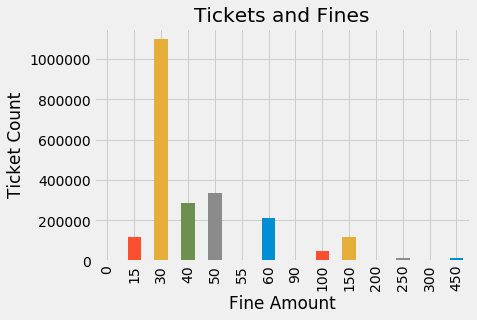

In [23]:
plt.style.use('fivethirtyeight')
fines.plot.bar()
plt.xlabel('Fine Amount')
plt.ylabel('Ticket Count')
plt.title('Tickets and Fines')

We can see that almost all of the tickets given out have fines of 30 dollars.

In [24]:
tickets['set_fine_amount'].value_counts(normalize=True) * 100

30     48.819720
50     14.987974
40     12.703919
60      9.368753
150     5.306416
15      5.296082
100     2.056404
450     0.711517
250     0.651377
90      0.040803
300     0.039073
0       0.009979
55      0.007850
200     0.000133
Name: set_fine_amount, dtype: float64

In [25]:
ticket_total = fines * fines.index

In [26]:
ticket_total.sum()

109675985.0

Total ticket fines are worth **$109,675,985** in revenue. Tickets are challenged in court and they can reduced or dismissed entirely. Unfortunately that data wasn't available. However we can look at the potential amount of revenue parking tickets bring in for the city.

According to the city of Toronto's Revenue Fact [Sheet](https://www.toronto.ca/city-government/budget-finances/city-finance/long-term-financial-plan/city-revenue-fact-sheet/) parking tickets are worth quite a bit of money when compared to additional revenue options that the city can implement. The options highlighted in grey can't be implemented easily.



![revenue options](revenue_options_kpmg.png)

## Deeper Exploration of Tickets

Now that we have some general information about parking fines we can explore what people are being fined for.
We know the most common fine is $30 and that the number of fines is more than 1M.

We can explore the infractions and break it down to see what parking rules drivers are breaking.

In [39]:
infraction_info = tickets[['infraction_code','infraction_description','set_fine_amount']].drop_duplicates(subset='infraction_code').sort_values('infraction_code')

In [28]:
tickets['infraction_code'].value_counts()


5      401636
3      367638
29     339145
210    213327
207    131511
2      116498
9      110457
8       76414
403     74267
406     68271
6       64334
15      35490
192     26024
28      25909
312     21172
30      19879
134     15933
347     14687
16      13334
415     12787
337      8385
4        6567
48       6320
367      6254
257      6089
384      6088
336      5391
14       4938
250      4483
419      4373
        ...  
19          2
334         2
413         2
25          1
434         1
26          1
152         1
385         1
354         1
350         1
348         1
318         1
306         1
222         1
432         1
206         1
182         1
149         1
35          1
131         1
130         1
90          1
89          1
80          1
73          1
45          1
43          1
41          1
39          1
0           1
Name: infraction_code, Length: 181, dtype: int64

In [30]:
fine_30 = tickets[tickets['set_fine_amount'] == 30]

In [31]:
fine_30

,origin,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,1,***03850,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,NaN,NaN,ON
1,1,***03851,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
2,1,***98221,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,274 GEORGE ST,NaN,NaN,ON
3,1,***85499,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,270 GEORGE ST,NaN,NaN,ON
5,1,***16117,20160101,3,PARK ON PRIVATE PROPERTY,30,3.0,NaN,621 KING ST W,NaN,NaN,ON
6,1,***03853,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,3.0,NR,43 GLOUCESTER ST,NaN,NaN,ON
7,1,***03854,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,39 GLOUCESTER ST,NaN,NaN,ON
9,1,***03856,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,5.0,NR,31 GLOUCESTER ST,NaN,NaN,ON
10,1,***12254,20160101,3,PARK ON PRIVATE PROPERTY,30,6.0,NaN,25 MUTUAL ST,NaN,NaN,ON
11,1,***98222,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,7.0,NR,167 GERRARD ST E,NaN,NaN,ON


In [33]:
fine_types = fine_30.drop_duplicates(subset='infraction_code')

In [36]:
fine_types['infraction_code'].count()

43

There are 43 different infractions with a set fine of $30.

In [40]:
infraction_info

,infraction_code,infraction_description,set_fine_amount
1629565,0,PARK ON PRIVATE PROPERTY,30
3325,1,PARK FAIL TO DEPOSIT FEE METER,30
777,2,PARK - LONGER THAN 3 HOURS,15
5,3,PARK ON PRIVATE PROPERTY,30
889,4,PARK ON MUNICIPAL PROPERTY,30
39,5,PARK-SIGNED HWY-PROHIBIT DY/TM,40
538,6,PARK-SIGNED HWY-EXC PERMT TIME,40
43632,7,PARK/LEAVE-FIRE ROUTE,0
81,8,STAND VEH.-PROHIBIT TIME/DAY,60
22,9,STOP-SIGNED HWY-PROHIBIT TM/DY,60
